# Classification_Error_Metrics

# PART 1:

In [20]:
# This code will use decsion tree classification for a binary label classification task.

# The classification model used is arbitrary the main focus is more on the error metrics.

# Includes:

# Confusions Matrix (2x2) inc true positives, true negatives, false positives, false negatives.
# Overall accuracy aka classification accuracy
# Misclassification Rate
# Sensitivity, hit rate, recall, or true positive rate
# Specificity or true negative rate
# Precision or positive predictive value
# F1 Score
# Negative predictive value
# Fall out or false positive rate
# False negative rate
# False discovery rate
# F1 Score
# ROC curves
# AUC
# Mean Absolute Error
# Mean Squared Error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,  plot_tree

import os
import random

In [3]:
# Loading the sk learn breast cancer data set

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
# Features are all the columns except the target (has breast cancer)
X = df[df.columns[:-1]]

# Target is the has breast cancer target column
y = df['target']


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instatiate a decision tree classifier object
clf_dt = DecisionTreeClassifier()

# Train the model with the training X and y
clf_dt = clf_dt.fit(X_train, y_train)

There was actually 89 +ve cases of breast cancer
There was actually 54 -ve cases of breast cancer

 The accuracy score when predicting the test data 0.951048951048951



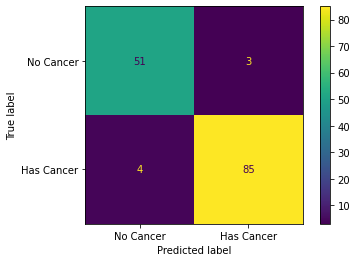

In [6]:
# predict the test data y_test
y_test_pred = clf_dt.predict(X_test)

# Then compare it to  the actual y_test data using this confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["No Cancer", "Has Cancer"])

# What is the accuracy of the model when it predicts the test Data (should be lower)  
print('There was actually ' + str(y_test.sum()) + ' +ve cases of breast cancer')
print('There was actually ' + str(len(y_test)-y_test.sum()) + ' -ve cases of breast cancer')
print ('')
print(f' The accuracy score when predicting the test data {accuracy_score(y_test_pred,y_test)}')
print ('')

# Error Metrics and Confusion Matrix Analysis:

Predictions can fall into one of 4 categories:

TN = True Negative, correctly identifying the lack of event A

FN = False Negative, incorrectly identifying the lack of event A

TP = True Positive, correctly identiying event A as happening

FP = False Positive, incorrectly identiying event A as happening

We say that the positive case is the label/class/category that we are interested in that we are trying to predict.

The negative is simply the alternative.


In [7]:
# For a 2x2 stand bivariate classification task confusion matrix

from sklearn import metrics
CM = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [8]:
# Overall accuracy aka classification accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# Misclassification Rate
MR = 1 - ACC


In [9]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 


In [10]:
# Precision or positive predictive value
PPV = TP/(TP+FP)

# F1 Score
F1 = 2 * ((PPV*TPR)/(PPV+TPR))

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)

# F1 Score
F1 = 2 * ((PPV*TPR)/(PPV+TPR))


# Classification Accuracy :

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

The measure is a percentage of how many we correctly predicited. The true to all ratio.

The problem with accuracy:

It works well only if there are equal number of samples belonging to each class. Where this is not the case it can lead to a misleading judgment of error.

![alt text](ACC.png "Title")



In [11]:
# For our decision tree

print(ACC)

0.951048951048951


# Misclassifiaction Rate :



The measure is a percentage of how many we incorrectly predicited. The false to all ratio.



![alt text](MR.png "Title")

In [12]:
# For our decision tree

MR = 1 - ACC

print(MR)

0.04895104895104896


# True Positive Rate (Sensitivity aka Recall, Hit Rate ) : 

True Positive Rate is defined as TP/ (FN+TP). 

True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.


![alt text](Sensitivity.gif "Title")

Another way of defining sensitivity:

The percentage that of True (1) events that actually happened and were correctly identified.


The problem with sensitivity: It doesn't account for the TN or FP (negative (0)) instances that actually occured. 


In [13]:
# For our decision tree

print(TPR)

0.9550561797752809


# True Negative Rate (Specificity) :

True Negative Rate is defined as TN / (FP+TN). 

True Negative Rate corresponds to the proportion of negative data points that are correctly predicted as negative, with respect to all negative data points.

![alt text](TNR.png "Title")

Another way of defining specificity:

The percentage of False (0) events that actually did NOT happen that were correctly labelled as NOT.

The percentage of False (0) events that where correctly labelled.


In [14]:
# For our decision tree

print(TNR)

0.9444444444444444


# Specificity and Sensitivity

They are good metrics for comparing models.

You could use one model over the other based whether it is more important to be able to predict 0's or 1's events


Specificity and sensitivity offer insight into whether a model is:

better at predicting an event happening (Sensitivity)

or

better at predicting an event will not happen (Specificity)

It could be that one is more important than the other.

# Precision AKA Positive Predictive Value:


Precision answers the following, note all statements are synonymous:

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

How precise the positive prediction is.

How well you predict the label in question.

How many of those that we predicted as true (1) were actually true (1)

![alt text](P.png "Title")

Note:

Higher precision = fewer mistakes in making positive/true/(1) predictions

Precision = 1 = perfect predictor = No false positives

Issue: Negative labels are left out of the picture

The problem with Precision: It doesn't account for the TN or FN instances (all of the negative (0) predicitions) 




In [15]:
# For our decision tree

print(PPV)

0.9659090909090909


# Precision and Recall (Sensitivity)

Both are good metrics yet, both can be misleading.

With precision, negative labels are not considered.(Considers only +ve predictions TP,FP)

With recall, falsely identified negative labels are considered (FN).

Ideally in a good classifier, we want both precision and recall to be one. (No FP or FN)

Which would mean 0 False positives and 0 false negatives.


# F1 - Score :

In a perfect classification model, precision and recall are one.

F1 Score is the Harmonic Mean between precision and recall and is a better measure than accuracy.

F1 score becomes high only when both precision and recall are high. 




![alt text](F1.gif "Title")



In [16]:
# Recall
# TPR

# Precision
# PPV

# F1 Score
F1 = 2 * ((PPV*TPR)/(PPV+TPR))

print(F1)

0.96045197740113


# Mean Absolute Error :

What is mean absolute error

In [18]:
# Mean Absolute Error

MAE = metrics.mean_absolute_error(y_true = y_test, y_pred = y_test_pred)

MAE

0.04895104895104895

# Mean Squared Error :

What is mean squared error.

In [19]:
# Mean Squared Error
MSE = metrics.mean_squared_error(y_true = y_test, y_pred = y_test_pred)

MSE

0.04895104895104895

# PART 2:

It is possible to iterate through variations of fitted model.

There are suitable metrics used to compare each iteration which use the count values for TN,TP,FP,FN.

They are the ROC and AUC.

Firstly though we need to become familiar with the FPR aka fallout rate.

# False Positive Rate AKA Fallout Rate : 

False Positive Rate is defined as FP / (FP+TN).

AKA 

FPR = 1 - specificity

False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.

![alt text](FP_Rate.png "Title")

In [17]:
print(FPR)

0.05555555555555555


# ROC :

ROC is a Receiver Operator Characteristic Graph.

Say you have a DTC model and you want to alter a single parameter and see how a range of values of it can change the quality of the model.

Instead of producing a confusion matrix for every tree:

We plot a set of TPR (Sensitivity) values against FPR (1 - specificity) values, a data point for each model.


The data points with the highest TPR and lowest FPR should be considered as the optimal value for the parameter.

Usually this is the one in the nearest to the top left corner.

Why? because a perfect classifier would have 1 TPR and 0 FPR.

EXAMPLE:

![alt text](ROC.png "Title")

# Area Under Curve :
Area Under Curve (AUC) is one of the most widely used metrics for evaluation.

It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

It is the area under the ROC curve

It is good for comparing one ROC curve to another.

Bigger AUC = Better ROC curve